In [586]:
import math
import numpy as np
import os

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set()
sns.set_style("ticks")
sns.set_context("paper")
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [587]:
three_d_points = np.array([
    [-0.08, -2.30333333, 1.19666667],  # Top right solar panel
    [-0.15666667, -0.84333333, 1.19666667],  # Top left solar panel
    [-0.08, -2.30333333, -0.78333333],  # Bottom right solar panel
    [-0.15666667, -0.84333333, -0.78333333],  # Bottom left solar panel
    [-0.24333333, 1.03, -0.65333333],  # Bottom left satellite
])

three_d_points_names = [
    'Top right solar panel',
    'Top left solar panel',
    'Bottom right solar panel',
    'Bottom left solar panel',
    'Bottom left satellite'
]


def get_rotated_point(roll, pitch, yaw, point=None):
    if point is None:
        point = [-0.08, -2.30333333, 1.19666667]

    r_roll = np.array([[1, 0, 0],
                       [0, math.cos(roll / 180 * math.pi), -math.sin(roll / 180 * math.pi)],
                       [0, math.sin(roll / 180 * math.pi), math.cos(roll / 180 * math.pi)]])

    r_pitch = np.array([[math.cos(pitch / 180 * math.pi), 0, math.sin(pitch / 180 * math.pi)],
                        [0, 1, 0],
                        [-math.sin(pitch / 180 * math.pi), 0, math.cos(pitch / 180 * math.pi)]])

    r_yaw = np.array([[math.cos(yaw / 180 * math.pi), -math.sin(yaw / 180 * math.pi), 0],
                      [math.sin(yaw / 180 * math.pi), math.cos(yaw / 180 * math.pi), 0],
                      [0, 0, 1]])

    rotation_matrix = r_yaw @ r_pitch @ r_roll

    rotated_3d_points = np.dot(rotation_matrix, point)

    return rotated_3d_points

In [588]:
folder = "../test_images/dynamic_unknowndeg_0to360_5degstep/"
suffixes = ['_linefit_eps2']
colors = ['red', 'green', 'blue']
nice_suffixes = [s.removeprefix("_").replace('_', ' ').capitalize() for s in suffixes]


In [589]:
df_true = pd.read_csv(folder + "real_scores.csv")
df_true = df_true.rename(columns={'correct_roll': 'roll', 'correct_pitch': 'pitch', 'correct_yaw':
    'yaw'})
df_true['img_number'] = df_true.index
df_true['suffix'] = 'true'
df_true

,roll,pitch,yaw,img_number,suffix
0,127.970000,-79.560000,-44.000000,0,true
1,123.295573,-78.244572,-44.152291,1,true
2,119.068439,-76.935369,-44.763274,2,true
3,115.161870,-75.638750,-45.707437,3,true
4,111.491226,-74.359729,-46.901282,4,true
...,...,...,...,...,...
68,157.623186,-84.620406,-54.433702,68,true
69,147.366750,-83.432329,-48.971823,69,true
70,139.573127,-82.170727,-45.978678,70,true
71,133.288987,-80.872993,-44.502381,71,true


In [590]:
df_guess = pd.read_csv(folder + "guesses_linefit_eps2.csv")
df_guess

,img_number,roll,pitch,yaw,x,y,z,roll_min,roll_max,pitch_min,pitch_max,yaw_min,yaw_max,x_min,x_max,y_min,y_max,z_min,z_max
0,0,0.000000,-89.550000,79.000000,0.000000,0.000000,0.000000,-16.000000,16.000000,-97.550000,-81.550000,71.000000,87.000000,-0.400000,0.400000,-0.400000,0.400000,-0.400000,0.400000
1,1,0.000000,-89.550000,79.000000,0.000000,0.000000,0.000000,-52.000000,52.000000,-115.550000,-63.550000,53.000000,105.000000,-1.300000,1.300000,-1.300000,1.300000,-1.300000,1.300000
2,2,0.000000,-89.550000,79.000000,0.000000,0.000000,0.000000,-88.000000,88.000000,-133.550000,-45.550000,35.000000,123.000000,-2.200000,2.200000,-2.200000,2.200000,-2.200000,2.200000
3,3,22.876162,-63.944633,54.110662,0.356624,0.264324,0.545960,14.876162,30.876162,-67.944633,-59.944633,50.110662,58.110662,0.156624,0.556624,0.064324,0.464324,0.345960,0.745960
4,4,16.079172,-66.212814,55.965422,0.335762,0.252480,0.345960,8.079172,24.079172,-70.212814,-62.212814,51.965422,59.965422,0.135762,0.535762,0.052480,0.452480,0.145960,0.545960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,139,-691.968912,-55.196023,85.502506,0.109819,0.134694,-0.815691,-698.356800,-685.581023,-56.370969,-54.021078,78.903710,92.101302,0.092693,0.126945,0.115138,0.154249,-1.074526,-0.556856
140,140,-694.899242,-54.340049,83.659213,0.093967,0.140005,-1.056794,-699.962804,-689.835680,-55.319261,-53.360837,78.374370,88.944056,0.076843,0.111091,0.120773,0.159236,-1.264095,-0.849492
141,141,-698.153864,-54.108789,82.215928,0.092372,0.142156,-1.111792,-701.998330,-694.309398,-55.221669,-52.995910,78.171196,86.260660,0.073150,0.111594,0.124907,0.159404,-1.343774,-0.879810
142,142,-699.575820,-53.534063,78.504118,0.081954,0.168299,-1.288782,-702.374843,-696.776797,-54.691859,-52.376267,75.466440,81.541795,0.062626,0.101283,0.150128,0.186469,-1.522677,-1.054887


In [591]:
df = pd.read_csv(folder + "fine_scores_linefit_eps2.csv")
df

,img_number,iterations,loss,roll,pitch,yaw,x,y,z
0,0,1400,4.565237e+02,3.441566,-97.550000,87.000000,0.111225,0.023159,-0.400000
1,1,2464,1.409746e+01,13.804774,-63.550000,68.142186,0.245557,0.237875,-0.146362
2,2,777,1.162726e-10,22.876162,-63.944633,54.110662,0.356624,0.264324,0.545960
3,3,546,1.364390e-03,16.079172,-66.212814,55.965422,0.335762,0.252480,0.345960
4,4,707,5.788515e-08,9.101630,-68.214576,57.911846,0.335037,0.243406,0.327064
...,...,...,...,...,...,...,...,...,...
139,139,413,2.319296e-11,-690.156413,-55.597477,83.794506,0.110701,0.135340,-0.816241
140,140,336,2.718640e-03,-694.026606,-55.319261,82.963128,0.107787,0.136455,-0.883065
141,141,427,7.085602e-02,-696.116180,-54.665442,79.956217,0.096657,0.159404,-1.064226
142,142,399,4.565117e-03,-698.991545,-54.443775,78.290453,0.096284,0.160662,-1.054887


In [592]:
df_guess

,img_number,roll,pitch,yaw,x,y,z,roll_min,roll_max,pitch_min,pitch_max,yaw_min,yaw_max,x_min,x_max,y_min,y_max,z_min,z_max
0,0,0.000000,-89.550000,79.000000,0.000000,0.000000,0.000000,-16.000000,16.000000,-97.550000,-81.550000,71.000000,87.000000,-0.400000,0.400000,-0.400000,0.400000,-0.400000,0.400000
1,1,0.000000,-89.550000,79.000000,0.000000,0.000000,0.000000,-52.000000,52.000000,-115.550000,-63.550000,53.000000,105.000000,-1.300000,1.300000,-1.300000,1.300000,-1.300000,1.300000
2,2,0.000000,-89.550000,79.000000,0.000000,0.000000,0.000000,-88.000000,88.000000,-133.550000,-45.550000,35.000000,123.000000,-2.200000,2.200000,-2.200000,2.200000,-2.200000,2.200000
3,3,22.876162,-63.944633,54.110662,0.356624,0.264324,0.545960,14.876162,30.876162,-67.944633,-59.944633,50.110662,58.110662,0.156624,0.556624,0.064324,0.464324,0.345960,0.745960
4,4,16.079172,-66.212814,55.965422,0.335762,0.252480,0.345960,8.079172,24.079172,-70.212814,-62.212814,51.965422,59.965422,0.135762,0.535762,0.052480,0.452480,0.145960,0.545960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,139,-691.968912,-55.196023,85.502506,0.109819,0.134694,-0.815691,-698.356800,-685.581023,-56.370969,-54.021078,78.903710,92.101302,0.092693,0.126945,0.115138,0.154249,-1.074526,-0.556856
140,140,-694.899242,-54.340049,83.659213,0.093967,0.140005,-1.056794,-699.962804,-689.835680,-55.319261,-53.360837,78.374370,88.944056,0.076843,0.111091,0.120773,0.159236,-1.264095,-0.849492
141,141,-698.153864,-54.108789,82.215928,0.092372,0.142156,-1.111792,-701.998330,-694.309398,-55.221669,-52.995910,78.171196,86.260660,0.073150,0.111594,0.124907,0.159404,-1.343774,-0.879810
142,142,-699.575820,-53.534063,78.504118,0.081954,0.168299,-1.288782,-702.374843,-696.776797,-54.691859,-52.376267,75.466440,81.541795,0.062626,0.101283,0.150128,0.186469,-1.522677,-1.054887


In [593]:
def plot_guess(guess_type, df=df_guess):
    sns.lineplot(data=df, x='img_number', y=guess_type, color='blue', ci=None)
    sns.lineplot(data=df, x='img_number', y=guess_type + '_min', color='red', ci=None)
    sns.lineplot(data=df, x='img_number', y=guess_type + '_max', color='green', ci=None)
    sns.scatterplot(data=df, x='img_number', y=guess_type, color='black')
    plt.legend(['Guess', 'Min', 'Max', 'Lowest loss estimate'])
    plt.title('SMA ' + guess_type + ' guesses')
    plt.xlabel('Image number')
    plt.ylabel(guess_type + ' (deg)')
    plt.show()

In [594]:
df_guess_mod = df_guess.copy()
# df_guess['roll'] go from -180 to 180
df_guess_mod['roll'] = df_guess['roll'] % 360 - 180
# pitch goes from 0 - 180 to -90 - 90
df_guess_mod['pitch'] = df_guess['pitch'] % 360 - 180
df_guess_mod['yaw'] = df_guess['yaw'] % 360 - 180

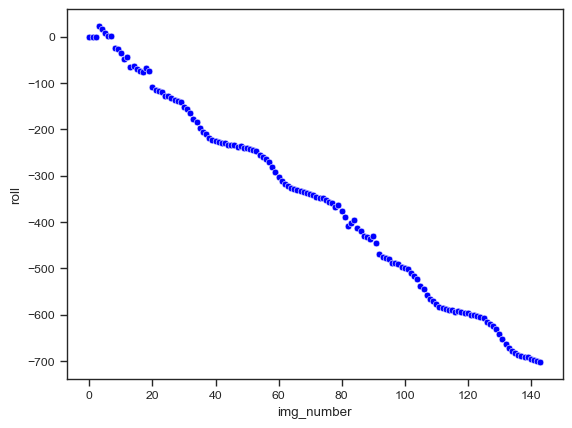

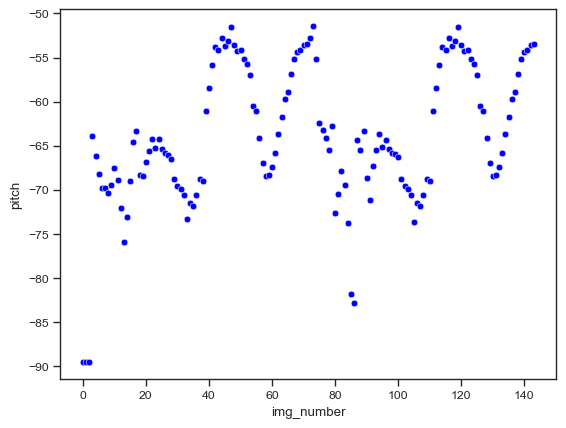

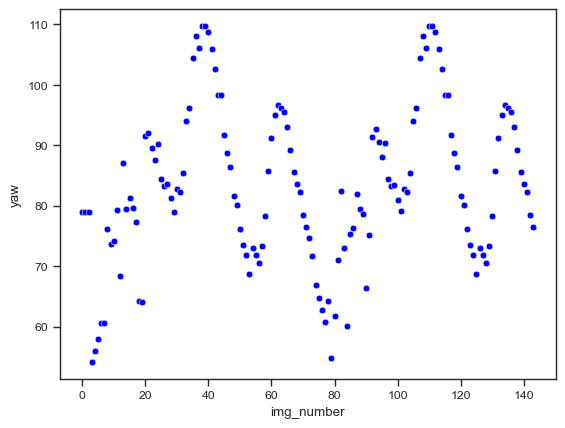

In [595]:
for guess_type in ['roll', 'pitch', 'yaw']:
    # sns.scatterplot(data=df_true, x='img_number', y=guess_type, color='black')
    sns.scatterplot(data=df_guess, x='img_number', y=guess_type, color='blue')
    plt.show()

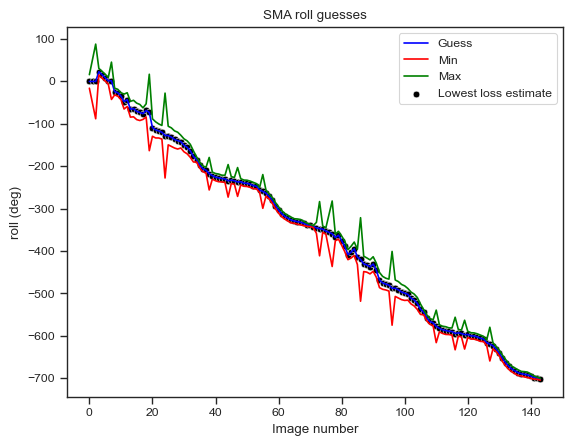

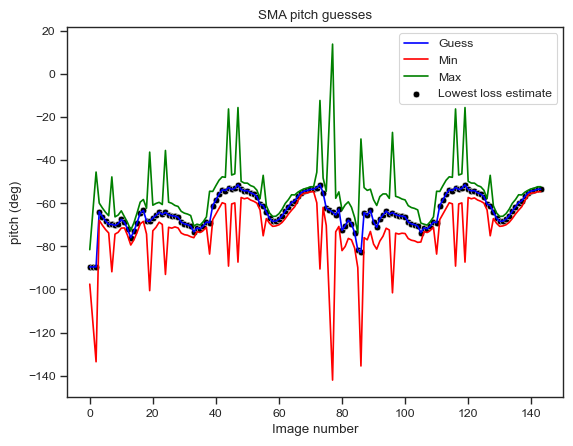

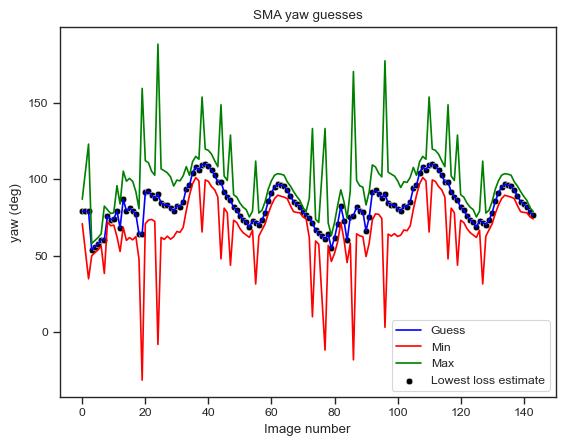

In [596]:
for guess_type in ['roll', 'pitch', 'yaw']:
    plot_guess(guess_type)

In [597]:
# def plot_reg(guess_type):
#     sns.regplot(data=df_guess, x='true_' + guess_type, y='guess_' + guess_type, ci=None)
#     plt.show()

In [598]:
# for guess_type in ['roll', 'pitch', 'yaw']:
#     plot_reg(guess_type)

In [599]:
df_rotated_points = pd.DataFrame()
for i, point in enumerate(three_d_points):
    df_local = df.apply(
        lambda row: get_rotated_point(row['roll'], row['pitch'], row['yaw'], point),
        axis=1, result_type='expand').rename(columns={0: 'x', 1: 'y', 2: 'z'})
    df_local['img_number'] = df['img_number']
    df_local['3d_point'] = three_d_points_names[i]
    df_rotated_points = pd.concat([df_local, df_rotated_points])

In [600]:
df_rotated_points.to_csv(folder + 'rotated_points.csv', index=False)

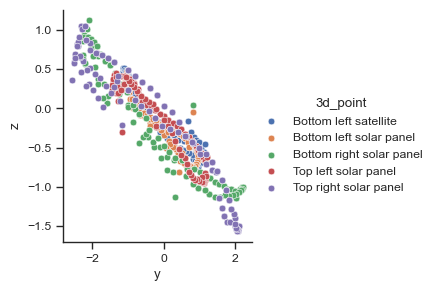

In [601]:
sns.FacetGrid(df_rotated_points, hue='3d_point').map(sns.scatterplot, 'y', 'z').add_legend()

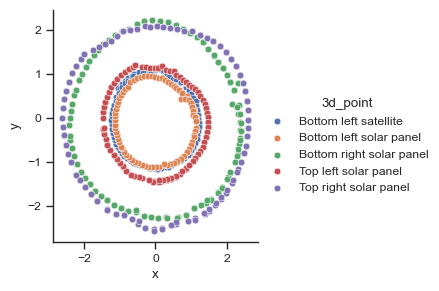

In [602]:
sns.FacetGrid(df_rotated_points, hue='3d_point').map(sns.scatterplot, 'x', 'y').add_legend()

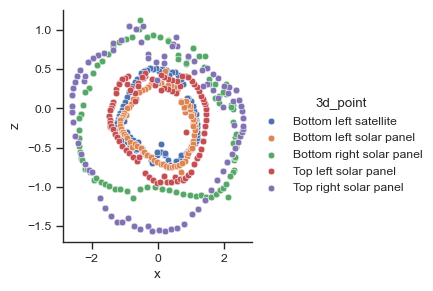

In [603]:
sns.FacetGrid(df_rotated_points, hue='3d_point').map(sns.scatterplot, 'x', 'z').add_legend()